In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import glob
import cv2
import json
import os
import numpy as np
import numpy.matlib

plt.rcParams['figure.figsize'] = 15, 8

In [2]:
GOOGLE_JSON_PATH = '../../google/output/properties/'

def open_json_and_img(image_path):
    base_name = os.path.basename(image_path)
    with open(GOOGLE_JSON_PATH + base_name + '.json') as f:
        google_data = json.loads(f.read())
        
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return google_data, img

In [3]:
def treat_color_json(filename, color_json):
    results = []
    for color in color_json['responses'][0]['imagePropertiesAnnotation']['dominantColors']['colors']:
        res = {}
        res['file'] = filename
        
        res['R'] = color['color']['red'] if 'red' in color['color'].keys() else 0
        res['G'] = color['color']['green'] if 'green' in color['color'].keys() else 0
        res['B'] = color['color']['blue'] if 'blue' in color['color'].keys() else 0

        res['pixelFraction'] = color['pixelFraction']
        res['score'] = color['score']

        results.append(res)
        
    return results

In [4]:
IMG_PATH = '../../../Osintgram/output/covidartmuseum_*.jpg'

def load_data():
    image_paths = glob.glob(IMG_PATH)
    images_np = {}
    color_data = []
    for image_path in image_paths:
        base_name = os.path.basename(image_path)
        color_json, img = open_json_and_img(image_path)
        
        images_np[base_name] = img
        color_data.extend(treat_color_json(base_name, color_json))
        
    return images_np, color_data

In [5]:
images_np, color_data = load_data()

In [6]:
pd_color_data = pd.DataFrame(color_data)

# Procesamiento

In [7]:
pd_color_data['file'].unique()

array(['covidartmuseum_2473568429358760633_31985798421.jpg',
       'covidartmuseum_2460616626308661396_31985798421.jpg',
       'covidartmuseum_2347496194261481504_31985798421.jpg', ...,
       'covidartmuseum_2291043057051243525_31985798421.jpg',
       'covidartmuseum_2309611699160725558_31985798421.jpg',
       'covidartmuseum_2290260589297624942_31985798421.jpg'], dtype=object)

In [8]:
pd_color_data['file'].sample(1).iloc[0]

'covidartmuseum_2270629972213671378_31985798421.jpg'

# Check image

In [9]:
check_image = pd_color_data['file'].sample(1).iloc[0]

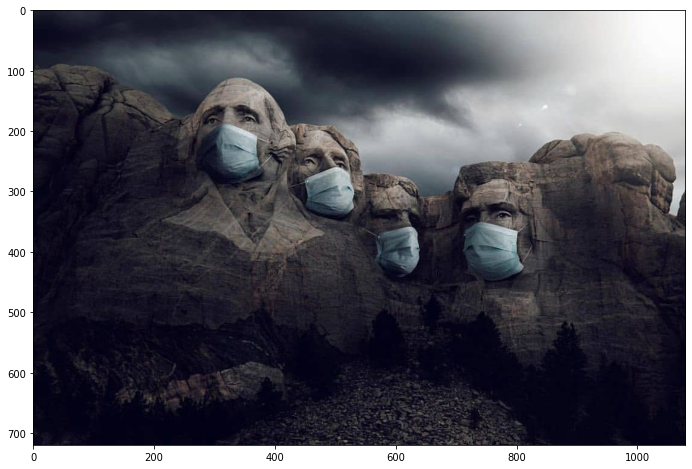

In [10]:
plt.imshow(images_np[check_image])

In [11]:
check_pd = pd_color_data[pd_color_data['file'] == check_image]

In [13]:
check_pd

,file,R,G,B,pixelFraction,score
5320,covidartmuseum_2485748535552410568_31985798421...,83.0,84.0,87.0,0.094667,0.231689
5321,covidartmuseum_2485748535552410568_31985798421...,53.0,52.0,57.0,0.165933,0.209603
5322,covidartmuseum_2485748535552410568_31985798421...,117.0,118.0,121.0,0.053733,0.201461
5323,covidartmuseum_2485748535552410568_31985798421...,153.0,157.0,160.0,0.040600,0.166186
5324,covidartmuseum_2485748535552410568_31985798421...,186.0,188.0,192.0,0.059933,0.093210
5325,covidartmuseum_2485748535552410568_31985798421...,27.0,25.0,32.0,0.212067,0.036955
5326,covidartmuseum_2485748535552410568_31985798421...,45.0,52.0,66.0,0.027400,0.020749
5327,covidartmuseum_2485748535552410568_31985798421...,110.0,121.0,137.0,0.001867,0.018429
5328,covidartmuseum_2485748535552410568_31985798421...,71.0,87.0,100.0,0.003533,0.010785
5329,covidartmuseum_2485748535552410568_31985798421...,24.0,27.0,40.0,0.300867,0.004244


In [14]:
SIZE = 256

color_matrix = []
for idx, item in check_pd.sort_values(by='pixelFraction').iterrows():
    color_matrix.extend([[item['R'], item['G'], item['B']]]*int(item['pixelFraction']*256))

In [15]:
np_color_matrix = np.array(color_matrix)

In [16]:
np_color_matrix_f = np.matlib.repmat(np_color_matrix, 20, 1).reshape(20, np_color_matrix.shape[0], 3).astype(int)

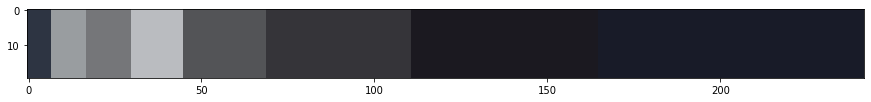

In [17]:
plt.imshow(np_color_matrix_f)